# Hello, KAN!

### Kolmogorov-Arnold representation theorem

Kolmogorov-Arnold representation theorem states that if $f$ is a multivariate continuous function
on a bounded domain, then it can be written as a finite composition of continuous functions of a
single variable and the binary operation of addition. More specifically, for a smooth $f : [0,1]^n \to \mathbb{R}$,


$$f(x) = f(x_1,...,x_n)=\sum_{q=1}^{2n+1}\Phi_q(\sum_{p=1}^n \phi_{q,p}(x_p))$$

where $\phi_{q,p}:[0,1]\to\mathbb{R}$ and $\Phi_q:\mathbb{R}\to\mathbb{R}$. In a sense, they showed that the only true multivariate function is addition, since every other function can be written using univariate functions and sum. However, this 2-Layer width-$(2n+1)$ Kolmogorov-Arnold representation may not be smooth due to its limited expressive power. We augment its expressive power by generalizing it to arbitrary depths and widths.

### Kolmogorov-Arnold Network (KAN)

The Kolmogorov-Arnold representation can be written in matrix form

$$f(x)={\bf \Phi}_{\rm out}\circ{\bf \Phi}_{\rm in}\circ {\bf x}$$

where 

$${\bf \Phi}_{\rm in}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n}(\cdot) \\ \vdots & & \vdots \\ \phi_{2n+1,1}(\cdot) & \cdots & \phi_{2n+1,n}(\cdot) \end{pmatrix},\quad {\bf \Phi}_{\rm out}=\begin{pmatrix} \Phi_1(\cdot) & \cdots & \Phi_{2n+1}(\cdot)\end{pmatrix}$$

We notice that both ${\bf \Phi}_{\rm in}$ and ${\bf \Phi}_{\rm out}$ are special cases of the following function matrix ${\bf \Phi}$ (with $n_{\rm in}$ inputs, and $n_{\rm out}$ outputs), we call a Kolmogorov-Arnold layer:

$${\bf \Phi}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n_{\rm in}}(\cdot) \\ \vdots & & \vdots \\ \phi_{n_{\rm out},1}(\cdot) & \cdots & \phi_{n_{\rm out},n_{\rm in}}(\cdot) \end{pmatrix}$$

${\bf \Phi}_{\rm in}$ corresponds to $n_{\rm in}=n, n_{\rm out}=2n+1$, and ${\bf \Phi}_{\rm out}$ corresponds to $n_{\rm in}=2n+1, n_{\rm out}=1$.

After defining the layer, we can construct a Kolmogorov-Arnold network simply by stacking layers! Let's say we have $L$ layers, with the $l^{\rm th}$ layer ${\bf \Phi}_l$ have shape $(n_{l+1}, n_{l})$. Then the whole network is

$${\rm KAN}({\bf x})={\bf \Phi}_{L-1}\circ\cdots \circ{\bf \Phi}_1\circ{\bf \Phi}_0\circ {\bf x}$$

In constrast, a Multi-Layer Perceptron is interleaved by linear layers ${\bf W}_l$ and nonlinearities $\sigma$:

$${\rm MLP}({\bf x})={\bf W}_{L-1}\circ\sigma\circ\cdots\circ {\bf W}_1\circ\sigma\circ {\bf W}_0\circ {\bf x}$$

A KAN can be easily visualized. (1) A KAN is simply stack of KAN layers. (2) Each KAN layer can be visualized as a fully-connected layer, with a 1D function placed on each edge. Let's see an example below.

### Get started with KANs

Initialize KAN

train loss: 2.10e-03 | test loss: 2.22e-03 | reg: 0.00e+00 : 100%|██| 20/20 [00:01<00:00, 10.30it/s]
train loss: 5.27e-03 | test loss: 6.16e-03 | reg: 0.00e+00 : 100%|██| 20/20 [00:02<00:00,  7.05it/s]


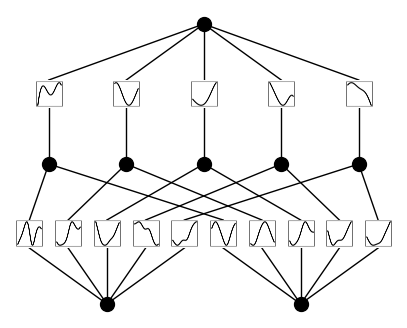

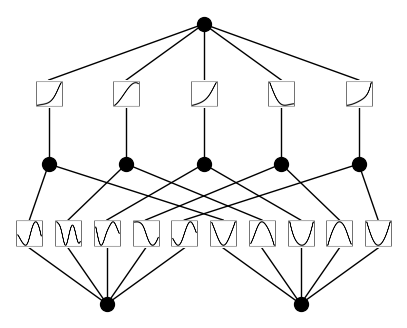

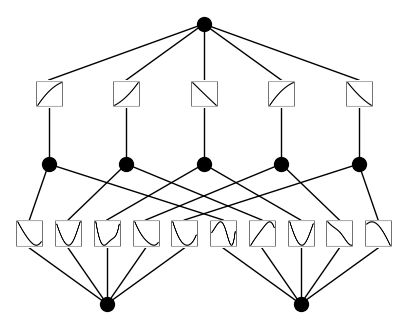

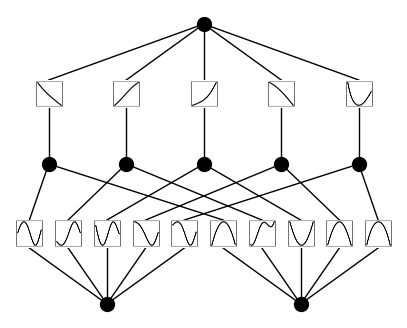

In [1]:
from fast_kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN([2,5,1],10,symbolic_enabled=False)
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)
model.train(dataset, opt="LBFGS", steps=20,lr=0.1,);
model.plot(beta=1000000)

from better_kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN([2,5,1],10,symbolic_enabled=False)
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)
model.train(dataset, opt="LBFGS", steps=20,lr=0.1);
model.plot(beta=1000000)

Create dataset

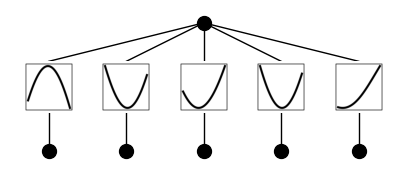

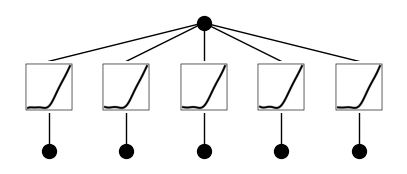

In [2]:
# train the model
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = RBFKANLayer(5,1,50)
x=torch.zeros(10000,1)
torch.nn.init.uniform_(x,-1,1)
y=torch.nn.functional.relu(x)

x_train=x.repeat(1,5)
y_train=y.unsqueeze(1).repeat(1,1,5)

opt=LBFGS(model.parameters(),lr=0.1)
for i in range(20):
    def closure():
        opt.zero_grad()
        postact=model(x_train)[-1]
        loss=torch.nn.functional.mse_loss(postact,y_train)
        loss.backward()
        return loss
    opt.step(closure)
    
kan_model=KAN([5,1],10)
kan_model(x_train)
kan_model.plot(beta=1000)
kan_model.act_fun[0]=model
kan_model(x_train)
kan_model.plot(beta=1000)


Plot KAN at initialization

tensor(0.1470, grad_fn=<MseLossBackward0>)
tensor(0.0028, grad_fn=<MseLossBackward0>)
tensor(9.5249e-05, grad_fn=<MseLossBackward0>)
tensor(3.2674e-05, grad_fn=<MseLossBackward0>)
tensor(9.2828e-06, grad_fn=<MseLossBackward0>)
tensor(4.6646e-06, grad_fn=<MseLossBackward0>)
tensor(2.5079e-06, grad_fn=<MseLossBackward0>)
tensor(1.4890e-06, grad_fn=<MseLossBackward0>)
tensor(9.2228e-07, grad_fn=<MseLossBackward0>)
tensor(6.1688e-07, grad_fn=<MseLossBackward0>)
tensor(4.1430e-07, grad_fn=<MseLossBackward0>)
tensor(3.3242e-07, grad_fn=<MseLossBackward0>)
tensor(2.6525e-07, grad_fn=<MseLossBackward0>)
tensor(1.9667e-07, grad_fn=<MseLossBackward0>)
tensor(1.6187e-07, grad_fn=<MseLossBackward0>)
tensor(1.3935e-07, grad_fn=<MseLossBackward0>)
tensor(1.2337e-07, grad_fn=<MseLossBackward0>)
tensor(1.0883e-07, grad_fn=<MseLossBackward0>)
tensor(9.4490e-08, grad_fn=<MseLossBackward0>)
tensor(8.4113e-08, grad_fn=<MseLossBackward0>)


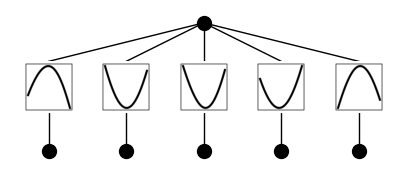

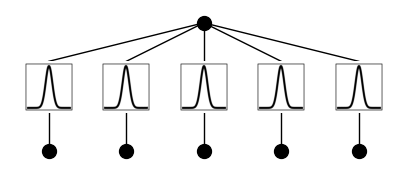

In [3]:
# train the model
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = RBFKANLayer(5,1,500,base_fn=lambda x:torch.zeros_like(x))
x=torch.zeros(1000,1)
torch.nn.init.uniform_(x,-1,1)
y=torch.exp(-(x**2)*20)

x_train=x.repeat(1,5)
y_train=y.unsqueeze(1).repeat(1,1,5)

opt=LBFGS(model.parameters(),lr=0.1,tolerance_change=1e-32,tolerance_grad=1e-32)
for i in range(20):
    def closure():
        opt.zero_grad()
        postact=model(x_train)[-1]
        loss=torch.nn.functional.mse_loss(postact,y_train)
        loss.backward()
        return loss

    print(opt.step(closure))
    
kan_model=KAN([5,1],20,bias_trainable=False)
kan_model(x_train)
kan_model.plot(beta=1000)
kan_model.act_fun[0]=model
kan_model(x_train)
kan_model.plot(beta=1000)


Train KAN with sparsity regularization

train loss: 8.03e-04 | test loss: 8.22e-04 | reg: 0.00e+00 : 100%|██| 40/40 [00:03<00:00, 10.02it/s]
train loss: 2.06e-04 | test loss: 2.06e-04 | reg: 0.00e+00 : 100%|██| 20/20 [00:00<00:00, 24.68it/s]
train loss: 4.69e-04 | test loss: 4.68e-04 | reg: 0.00e+00 : 100%|██| 40/40 [00:03<00:00, 10.68it/s]
train loss: 2.46e-04 | test loss: 2.46e-04 | reg: 0.00e+00 : 100%|██| 20/20 [00:00<00:00, 35.96it/s]


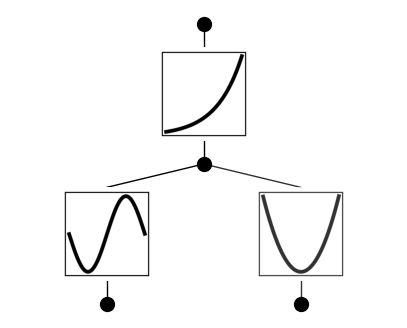

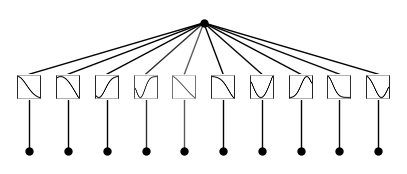

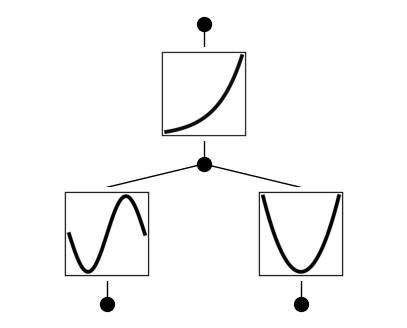

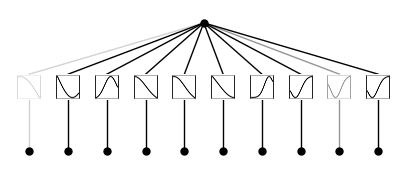

In [4]:
from fast_kan import *
model = KAN([2,1,1],20,bias_trainable=True,seed=0,symbolic_enabled=True)
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset=create_dataset(f, n_var=2)
model.train(dataset, opt="LBFGS", steps=40,lr=0.1);
model.plot()

model=KAN([10,1],1,base_fn=lambda x:torch.zeros_like(x),bias_trainable=False)
x=torch.linspace(-1,1,1000).unsqueeze(1)
y=torch.sin(x*torch.pi)
x=x.repeat(1,10)
dataset={'train_input':x,'train_label':y,'test_input':x,'test_label':y}
model.train(dataset, opt="LBFGS", steps=20,lr=0.1);
model.plot()

from better_kan import *
model = KAN([2,1,1],20,bias_trainable=True,seed=0,symbolic_enabled=True)
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset=create_dataset(f, n_var=2)
model.train(dataset, opt="LBFGS", steps=40,lr=0.1);
model.plot()

model=KAN([10,1],1,base_fn=lambda x:torch.zeros_like(x),bias_trainable=False)
x=torch.linspace(-1,1,1000).unsqueeze(1)
y=torch.sin(x*torch.pi)
x=x.repeat(1,10)
dataset={'train_input':x,'train_label':y,'test_input':x,'test_label':y}
model.train(dataset, opt="LBFGS", steps=20,lr=0.1);
model.plot()



Plot trained KAN

In [5]:
# create dataset f(x,y) = exp(sin(pi*x)+y^2)



Prune KAN and replot (keep the original shape)

Prune KAN and replot (get a smaller shape)

Continue training and replot

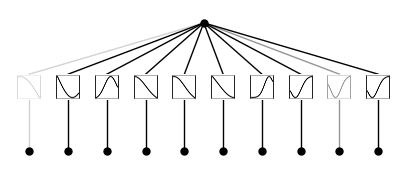

In [6]:
model.plot()

Automatically or manually set activation functions to be symbolic

In [7]:
mode = "manual" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)
print(model.symbolic_formula())

r2 is 0.9999055862426758
r2 is 0.9968744516372681


IndexError: index 1 is out of range

Continue training to almost machine precision

train loss: 1.31e-03 | test loss: 1.42e-03 | reg: 0.00e+00 : 100%|██| 50/50 [00:08<00:00,  5.64it/s]


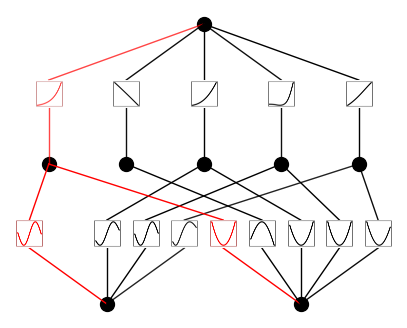

In [ ]:
model(dataset['train_input'])   
model.plot()

model.train(dataset, opt="LBFGS", steps=50,lr=0.1);

Obtain the symbolic formula

In [ ]:
print(model.symbolic_formula(2))

'str' object is not callable
make sure all activations need to be converted to symbolic formulas first!
None
